# **Task : Non-neural machine learning Home Assignment**
Group A (Regression)

 Task is to explore and prepare data and build classical ML models. Ideally, you would optimise the models' hyperparameters and evaluate models quantitatively and qualitatively from several aspects.

# **Solution**

Steps taken to perform and build classical ML models.

***Importing Libraries:*** The necessary libraries are imported including Pandas, NumPy, Matplotlib for visualization, and various modules from scikit-learn for machine learning tasks.

***Data Retrieval:*** The dataset is downloaded from a given URL using wget and saved as "smartwatch_gestures.csv".

***Data Loading and Exploration:*** The dataset is loaded into a Pandas DataFrame (df) and its head and descriptive statistics are displayed to understand its structure and summary statistics.

***Data Preprocessing:*** The data is standardized using StandardScaler from scikit-learn to ensure all features have a mean of 0 and a standard deviation of 1.

***Feature Selection and Target Variable:*** Features (X) and target variable (y) are selected from the DataFrame. Features include accelerometer data ('step01' to 'step51'), and the target variable is the 'nano_span'.

***Train-Test Split:*** The dataset is split into training, validation, and test sets using train_test_split() from scikit-learn.

**MODEL USED** :









*   ***Linear Regression Model without PCA:*** A linear regression model is trained on the training set.
The model is evaluated on the validation set using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared metrics.
Predictions are made on the test set and evaluated similarly.
PCA for Dimensionality Reduction: Principal Component Analysis (PCA) is applied to reduce the dimensionality of the feature space while retaining 95% of the variance.
*   ***Linear Regression Model with PCA:*** Another linear regression model is trained on the reduced feature space obtained from PCA.
The model is evaluated on the validation and test sets similarly to the model without PCA.

*   ***Random Forest Model without PCA:*** A Random Forest regression model is trained on the training set.
The model is evaluated on the validation and test sets using metrics similar to the linear regression models.
*   ***Random Forest Model with PCA:*** Another Random Forest regression model is trained on the reduced feature space obtained from PCA.
The model is evaluated on the validation and test sets similarly to the model without PCA.




***Results Presentation:***



1.   Results for both Linear Regression and Random Forest models are displayed in DataFrames(tabular) for comparison.
2.   Scatter plots are generated to visualize predicted vs actual values for both validation and test sets for each model.



In [ ]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
#Data Retrieval:
fileurl = "https://drive.google.com/uc?export=download&id=1v2sdDxTghDKfCVMKqBsxj0qwkdMl4gCA"

fileurl_with_quotes = f'"{fileurl}"'

filename = "smartwatch_gestures.csv"

!wget $fileurl_with_quotes -O $filename

--2024-04-02 09:18:30--  https://drive.google.com/uc?export=download&id=1v2sdDxTghDKfCVMKqBsxj0qwkdMl4gCA
Resolving drive.google.com (drive.google.com)... 173.194.210.101, 173.194.210.138, 173.194.210.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1v2sdDxTghDKfCVMKqBsxj0qwkdMl4gCA&export=download [following]
--2024-04-02 09:18:30--  https://drive.usercontent.google.com/download?id=1v2sdDxTghDKfCVMKqBsxj0qwkdMl4gCA&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7444690 (7.1M) [application/octet-stream]
Saving to: ‘smartwatch_gestures.csv’

smartwatch_gestures 100%[===================>]   7.

In [ ]:
#Data Loading and Exploration:
df = pd.read_csv("smartwatch_gestures.csv", header=[0, 1])

In [ ]:
df.head()

info                                           step01                   \
  gesture participant attempt   nano_span features/accel_x features/accel_y   
0       3           4       5  1099334717        -0.153229         0.459687   
1      15           4       7  1646362304         3.217807         0.612916   
2      19           3       8  2299163819         8.274362         0.000000   
3       3           8       8  1340087890        -8.427590        -0.919373   
4      16           7      10  2091003418        -2.604892         3.064578   

                                                             \
  features/accel_z features/time_event features/time_millis   
0        10.266337        4.284170e+11         1.384351e+12   
1         9.346964        7.642730e+11         1.384510e+12   
2         6.282385        6.308546e+12         1.384269e+12   
3         5.363012        2.042136e+12         1.387383e+12   
4         9.040505        3.529643e+12         1.387385e+12   

                       ...           step50                      \
  features/time_nanos  ... features/accel_z features/time_event   
0        1.416990e+14  ...              0.0                 0.0   
1        3.554920e+13  ...              0.0                 0.0   
2        1.161327e+14  ...              0.0                 0.0   
3        5.994491e+14  ...              0.0                 0.0   
4        6.011020e+14  ...              0.0                 0.0   

                                                     step51                   \
  features/time_millis features/time_nanos features/accel_x features/accel_y   
0                  0.0                 0.0              0.0              0.0   
1                  0.0                 0.0              0.0              0.0   
2                  0.0                 0.0              0.0              0.0   
3                  0.0                 0.0              0.0              0.0   
4                  0.0                 0.0              0.0              0.0   

                                                             \
  features/accel_z features/time_event features/time_millis   
0              0.0                 0.0                  0.0   
1              0.0                 0.0                  0.0   
2              0.0                 0.0                  0.0   
3              0.0                 0.0                  0.0   
4              0.0                 0.0                  0.0   

                       
  features/time_nanos  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 310 columns]

In [ ]:
df.describe()

info                                                   step01  \
           gesture  participant      attempt     nano_span features/accel_x   
count  3251.000000  3251.000000  3251.000000  3.251000e+03      3251.000000   
mean      9.496463     4.474316    10.677638  2.057514e+09         2.155338   
std       5.761749     2.286859     5.894095  5.152789e+08         4.848848   
min       0.000000     1.000000     1.000000  4.293823e+07        -9.653421   
25%       4.500000     2.000000     6.000000  1.658005e+09        -1.379060   
50%       9.000000     4.000000    11.000000  1.987640e+09         2.298434   
75%      14.000000     6.000000    16.000000  2.314529e+09         6.512228   
max      19.000000     8.000000    26.000000  5.511902e+09        10.113108   

                                                             \
      features/accel_y features/accel_z features/time_event   
count      3251.000000      3251.000000        3.251000e+03   
mean         -0.965469         7.724604        1.893967e+12   
std           2.752430         2.326593        1.559258e+12   
min          -9.193734         0.000000        5.082400e+10   
25%          -2.834734         5.975927        6.833365e+11   
50%          -1.072602         8.580819        1.382574e+12   
75%           0.612916         9.653421        2.592554e+12   
max           7.967903        14.863204        6.380766e+12   

                                                ...           step50  \
      features/time_millis features/time_nanos  ... features/accel_z   
count         3.251000e+03        3.251000e+03  ...      3251.000000   
mean          1.385145e+12        2.240258e+14  ...         0.003346   
std           1.308904e+09        2.230873e+14  ...         0.190805   
min           1.384186e+12        2.766216e+13  ...         0.000000   
25%           1.384251e+12        8.943488e+13  ...         0.000000   
50%           1.384355e+12        1.148534e+14  ...         0.000000   
75%           1.385110e+12        1.470505e+14  ...         0.000000   
max           1.387457e+12        6.595399e+14  ...        10.879252   

                                                                    \
      features/time_event features/time_millis features/time_nanos   
count        3.251000e+03         3.251000e+03        3.251000e+03   
mean         6.355866e+08         4.257726e+08        2.447429e+10   
std          3.623958e+10         2.427650e+10        1.395464e+12   
min          0.000000e+00         0.000000e+00        0.000000e+00   
25%          0.000000e+00         0.000000e+00        0.000000e+00   
50%          0.000000e+00         0.000000e+00        0.000000e+00   
75%          0.000000e+00         0.000000e+00        0.000000e+00   
max          2.066292e+12         1.384187e+12        7.956591e+13   

                step51                                                        \
      features/accel_x features/accel_y features/accel_z features/time_event   
count      3251.000000      3251.000000      3251.000000        3.251000e+03   
mean          0.000613        -0.000471         0.002875        6.356204e+08   
std           0.034936         0.026874         0.163931        3.624151e+10   
min           0.000000        -1.532289         0.000000        0.000000e+00   
25%           0.000000         0.000000         0.000000        0.000000e+00   
50%           0.000000         0.000000         0.000000        0.000000e+00   
75%           0.000000         0.000000         0.000000        0.000000e+00   
max           1.991976         0.000000         9.346964        2.066402e+12   

                                                
      features/time_millis features/time_nanos  
count         3.251000e+03        3.251000e+03  
mean          4.257726e+08        2.447432e+10  
std           2.427650e+10        1.395466e+12  
min           0.000000e+00        0.000000e+00  
25%           0.000000e+00        0.000000e+00  
50%           0.000000e+00

In [ ]:
#Data Preprocessing:
accel_columns = df.filter(like='features/accel_').columns
time_columns = df.filter(like='features/time_').columns

accel_mean = df[accel_columns].values.mean()
accel_std = df[accel_columns].values.std()

time_mean = df[time_columns].values.mean()
time_std = df[time_columns].values.std()

scaler = StandardScaler()
df[accel_columns] = scaler.fit_transform(df[accel_columns])
df[time_columns] = scaler.fit_transform(df[time_columns])

df

info                                           step01  \
     gesture participant attempt   nano_span features/accel_x   
0          3           4       5  1099334717        -0.476180   
1         15           4       7  1646362304         0.219151   
2         19           3       8  2299163819         1.262148   
3          3           8       8  1340087890        -2.182901   
4         16           7      10  2091003418        -0.981875   
...      ...         ...     ...         ...              ...   
3246      14           5       2  2208831787         0.851271   
3247       5           2      15  3095947265         0.819665   
3248      16           6       5  2409301758        -1.519176   
3249       3           7       5  1551330566        -1.582388   
3250      17           1       3  2425323486        -1.550782   

                                                            \
     features/accel_y features/accel_z features/time_event   
0            0.517861         1.092638           -0.940047   
1            0.573540         0.697419           -0.724619   
2            0.350824        -0.619980            2.831640   
3            0.016750        -1.015199            0.095040   
4            1.464403         0.565679            1.049170   
...               ...              ...                 ...   
3246        -1.375224        -0.422370           -0.145510   
3247        -1.820656        -1.015199           -0.585296   
3248         0.629219         0.499809           -0.726358   
3249         0.517861        -0.093020           -0.802022   
3250         2.076872        -0.422370            0.727127   

                                               ...           step50  \
     features/time_millis features/time_nanos  ... features/accel_z   
0               -0.607343           -0.369091  ...        -0.017541   
1               -0.485467           -0.844986  ...        -0.017541   
2               -0.669542           -0.483711  ...        -0.017541   
3                1.709913            1.683112  ...        -0.017541   
4                1.711136            1.690523  ...        -0.017541   
...                   ...                 ...  ...              ...   
3246            -0.603217           -0.348066  ...        -0.017541   
3247            -0.684978           -0.564027  ...        -0.017541   
3248            -0.027151           -0.600663  ...        -0.017541   
3249             1.692797            1.582782  ...        -0.017541   
3250            -0.731818           -0.643339  ...        -0.017541   

                                                                   \
     features/time_event features/time_millis features/time_nanos   
0              -0.017541            -0.017541           -0.017541   
1              -0.017541            -0.017541           -0.017541   
2              -0.017541            -0.017541           -0.017541   
3              -0.017541            -0.017541           -0.017541   
4              -0.017541            -0.017541           -0.017541   
...                  ...                  ...                 ...   
3246           -0.017541            -0.017541           -0.017541   
3247           -0.017541            -0.017541           -0.017541   
3248           -0.017541            -0.017541           -0.017541   
3249           -0.017541            -0.017541           -0.017541   
3250           -0.017541            -0.017541           -0.017541   

               step51                                                        \
     features/accel_x features/accel_y features/accel_z features/time_event   
0           -0.017541         0.017541        -0.017541           -0.017541   
1           -0.017541         0.017541        -0.017541           -0.017541   
2           -0.017541         0.017541        -0.017541           -0.017541   
3           -0.017541         0.017541        -0.017541           -0.017541   
4           -0.017541         0.017541        -0.017541    

In [ ]:
# Feature Selection and Target Variable:
X = df.loc[:, 'step01':'step51']  # Selected all columns from 'step01' to 'step05'
y =df.iloc[:,3]  # Access 'nano_span' from the second row headers


In [ ]:
# Train-Test Split:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
#MODEL USED :

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)


In [ ]:
# Calculation of MSE for linear regression model
val_mse = mean_squared_error(y_val, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculation of MAE for linear regression model
val_mae = mean_absolute_error(y_val, val_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Calculation of R2 Score for linear regression model
val_r2 = r2_score(y_val, val_predictions)
test_r2 = r2_score(y_test, test_predictions)

In [ ]:
# Dimension reduction
# Performing PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Train linear regression model on reduced feature space
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Evaluating the model on the validation set
val_predictions_pca = model_pca.predict(X_val_pca)

# Transforming test set using PCA
X_test_pca = pca.transform(X_test)

# Evaluating the model with PCA on the test set
test_predictions_pca = model_pca.predict(X_test_pca)


In [ ]:
# Calculation of MSE for linear regression model with PCA
val_mse_pca = mean_squared_error(y_val, val_predictions_pca)
test_mse_pca = mean_squared_error(y_test, test_predictions_pca)

# Calculation of MAE for linear regression model with PCA
val_mae_pca = mean_absolute_error(y_val, val_predictions_pca)
test_mae_pca = mean_absolute_error(y_test, test_predictions_pca)

# Calculation of R2 Score for linear regression model with PCA
val_r2_pca = r2_score(y_val, val_predictions_pca)
test_r2_pca = r2_score(y_test, test_predictions_pca)


In [ ]:
# Results Presentation:
linear_regression_results = pd.DataFrame({
    'Model': ['Linear Regression without PCA', 'Linear Regression with PCA'],
    'Validation MSE': [val_mse, val_mse_pca],
    'Test MSE': [test_mse, test_mse_pca],
    'Validation MAE': [val_mae, val_mae_pca],
    'Test MAE': [test_mae, test_mae_pca],
    'Validation R2-squared': [val_r2, val_r2_pca],
    'Test R2-squared': [test_r2, test_r2_pca]
})

print("Linear Regression Results:")
display(linear_regression_results)


Linear Regression Results:


,Model,Validation MSE,Test MSE,Validation MAE,Test MAE,Validation R2-squared,Test R2-squared
0,Linear Regression without PCA,3.537623e+35,3.521231e+36,3.299281e+16,1.603975e+17,-1.369016e+18,-1.505797e+19
1,Linear Regression with PCA,2.839336e+15,4.027330e+15,3.742252e+07,4.050406e+07,9.890121e-01,9.827778e-01


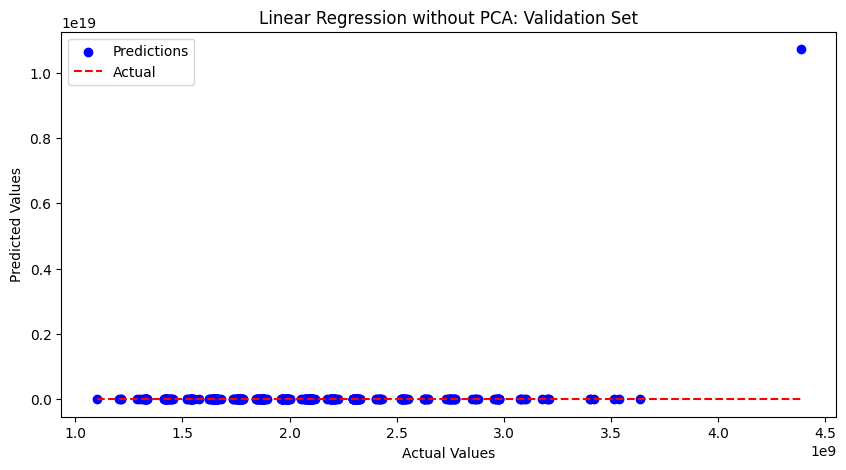

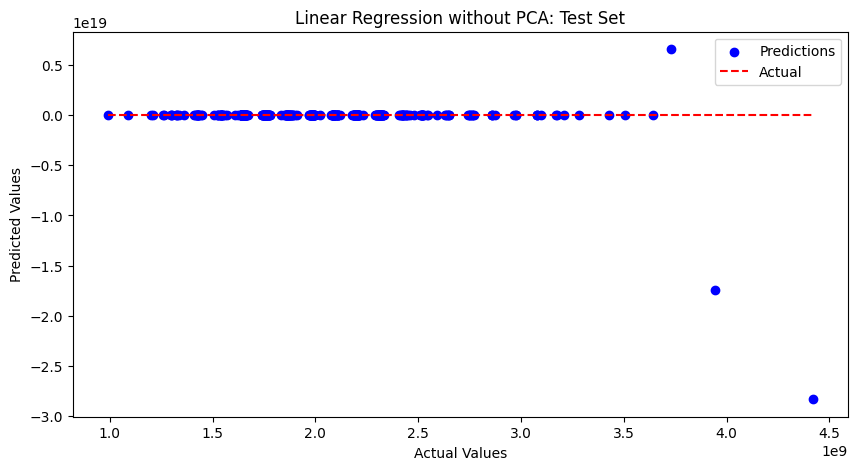

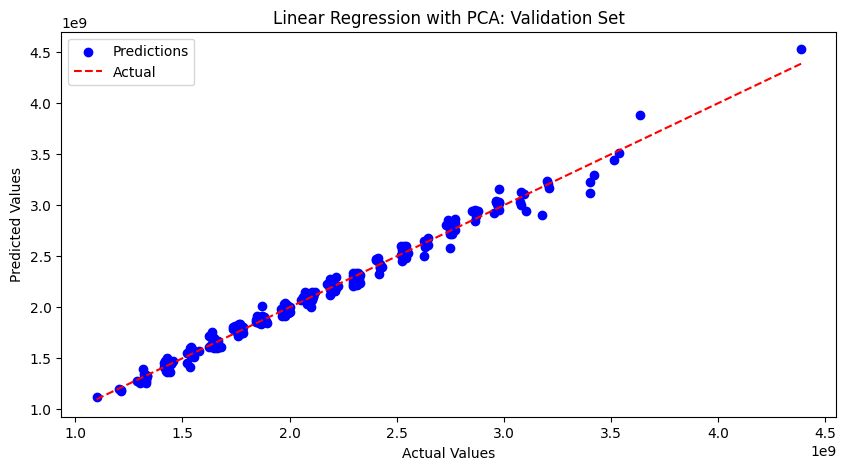

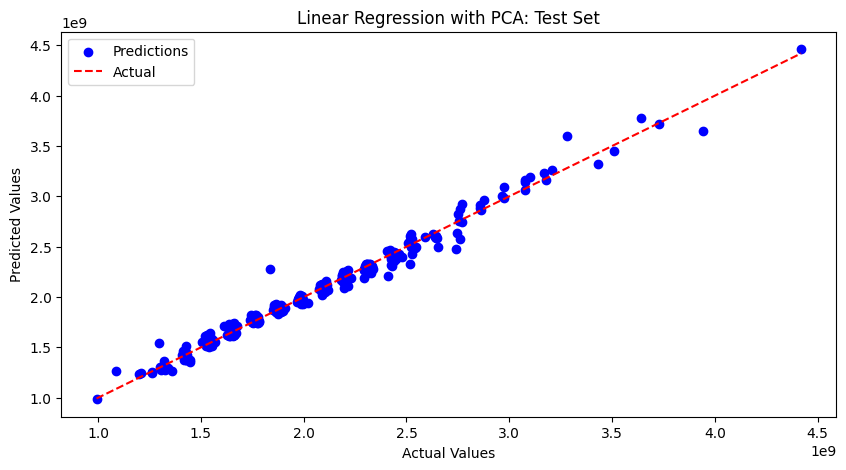

In [ ]:
# Plot predicted vs actual values for linear regression
plt.figure(figsize=(10, 5))
plt.scatter(y_val, val_predictions, color='blue', label='Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red', label='Actual')
plt.title('Linear Regression without PCA: Validation Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

print("\n\n")

plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Actual')
plt.title('Linear Regression without PCA: Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

print("\n\n")

# Plot predicted vs actual values for linear regression with PCA
plt.figure(figsize=(10, 5))
plt.scatter(y_val, val_predictions_pca, color='blue', label='Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red', label='Actual')
plt.title('Linear Regression with PCA: Validation Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

print("\n\n")

plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_predictions_pca, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Actual')
plt.title('Linear Regression with PCA: Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

#Evaluating the model on the validation set
val_predictions_rf = rf_model.predict(X_val)

#Evaluating the model on the test set
test_predictions_rf = rf_model.predict(X_test)

In [ ]:
# Calculation of MAE for Random Forest model
val_mae_rf = mean_absolute_error(y_val, val_predictions_rf)
test_mae_rf = mean_absolute_error(y_test, test_predictions_rf)

# Calculation of MSE for Random Forest model
val_mse_rf = mean_squared_error(y_val, val_predictions_rf)
test_mse_rf = mean_squared_error(y_test, test_predictions_rf)

# Calculation of the R-squared for Random Forest model
val_r2_rf = r2_score(y_val, val_predictions_rf)
test_r2_rf = r2_score(y_test, test_predictions_rf)

In [ ]:
# Dimension reduction
# Performing PCA for dimensionality reduction
pca_rf = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca_rf = pca_rf.fit_transform(X_train)
X_val_pca_rf = pca_rf.transform(X_val)
X_test_pca_rf = pca_rf.transform(X_test)

# Training Random Forest model on reduced feature space
rf_model_pca = RandomForestRegressor(random_state=42)
rf_model_pca.fit(X_train_pca_rf, y_train)

# Evaluating the model with PCA on the validation set
val_predictions_pca_rf = rf_model_pca.predict(X_val_pca_rf)

# Evaluating the model with PCA on the test set
test_predictions_pca_rf = rf_model_pca.predict(X_test_pca_rf)


In [ ]:
# Calculation of MSE for Random Forest model with PCA
val_mse_pca_rf = mean_squared_error(y_val, val_predictions_pca_rf)
test_mse_pca_rf = mean_squared_error(y_test, test_predictions_pca_rf)

# Calculation of MAE for Random Forest model with PCA
val_mae_pca_rf = mean_absolute_error(y_val, val_predictions_pca_rf)
test_mae_pca_rf = mean_absolute_error(y_test, test_predictions_pca_rf)

# Calculation of the R-squared for Random Forest model with PCA
val_r2_pca_rf = r2_score(y_val, val_predictions_pca_rf)
test_r2_pca_rf = r2_score(y_test, test_predictions_pca_rf)


In [ ]:
# Results Presentation:
random_forest_results = pd.DataFrame({
    'Model': ['Random Forest without PCA', 'Random Forest with PCA'],
    'Validation MSE': [val_mse_rf, val_mse_pca_rf],
    'Test MSE': [test_mse_rf, test_mse_pca_rf],
    'Validation MAE': [val_mae_rf, val_mae_pca_rf],
    'Test MAE': [test_mae_rf, test_mae_pca_rf],
    'Validation R-squared': [val_r2_rf, val_r2_pca_rf],
    'Test R-squared': [test_r2_rf, test_r2_pca_rf]
})

print("Random Forest Results:")
display(random_forest_results)

Random Forest Results:


,Model,Validation MSE,Test MSE,Validation MAE,Test MAE,Validation R-squared,Test R-squared
0,Random Forest without PCA,2.500956e+14,3.093853e+15,1.132194e+07,1.761604e+07,0.999032,0.98677
1,Random Forest with PCA,1.431739e+15,1.994614e+15,2.285699e+07,2.444929e+07,0.994459,0.99147


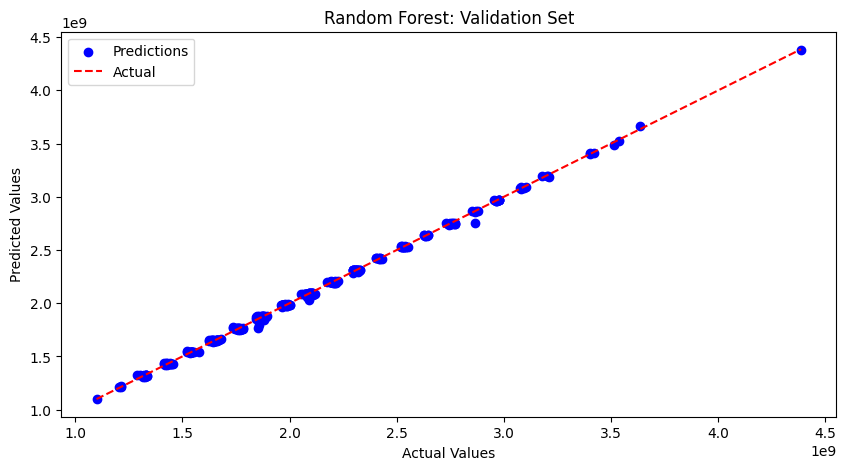

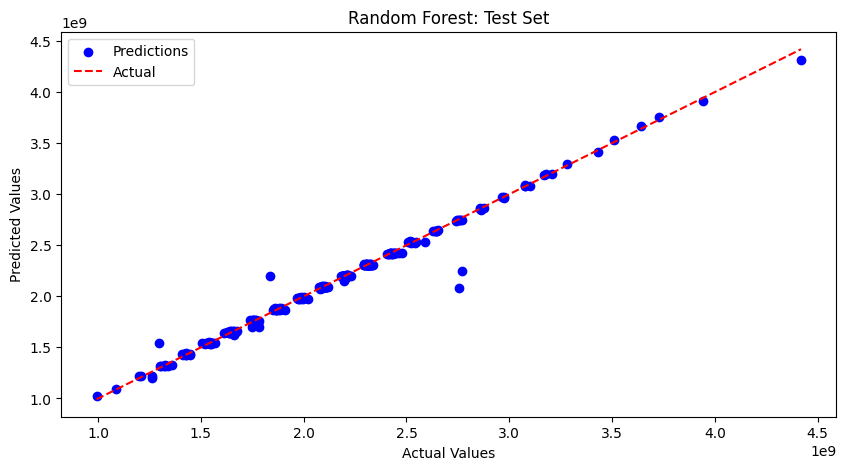

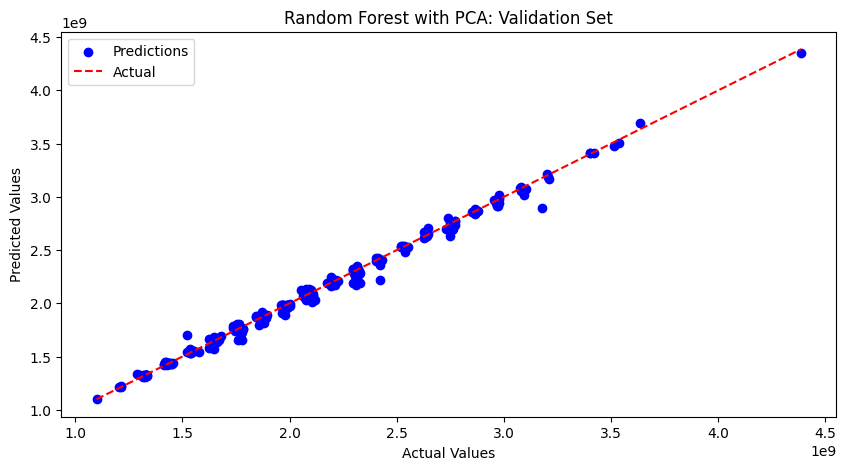

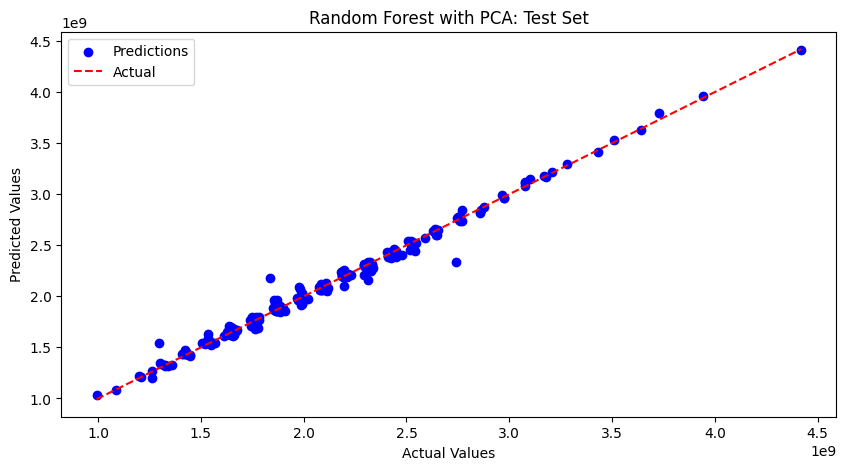

In [ ]:
# Plot predicted vs actual values for Random Forest
plt.figure(figsize=(10, 5))
plt.scatter(y_val, val_predictions_rf, color='blue', label='Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red', label='Actual')
plt.title('Random Forest: Validation Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

print("\n\n")

plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_predictions_rf, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Actual')
plt.title('Random Forest: Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

print("\n\n")

# Plot predicted vs actual values for Random Forest with PCA
plt.figure(figsize=(10, 5))
plt.scatter(y_val, val_predictions_pca_rf, color='blue', label='Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red', label='Actual')
plt.title('Random Forest with PCA: Validation Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

print("\n\n")

plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_predictions_pca_rf, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Actual')
plt.title('Random Forest with PCA: Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


# **Conclusion**

***Performance Comparison:***

Both models, linear regression and random forest, were evaluated with and without PCA (Principal Component Analysis) dimensionality reduction technique.
In terms of MSE (Mean Squared Error) and MAE (Mean Absolute Error), the random forest models generally outperformed the linear regression models.
Across both validation and test datasets, the random forest models consistently had lower MSE and MAE compared to the linear regression models, indicating better predictive performance.

***Effect of Dimension Reduction PCA:***

The linear regression model with PCA showed improvement in MSE and MAE compared to the linear regression model without PCA. This suggests that PCA helped in reducing overfitting or capturing important features.
However, for the random forest model, the effect of PCA on performance is less consistent. While the model with PCA had lower MSE in the validation set, it performed slightly worse in terms of MAE in both validation and test sets compared to the random forest model without PCA.

***R-squared (Coefficient of Determination):***

R-squared values measure the proportion of the variance in the dependent variable that is predictable from the independent variables.
Both linear regression and random forest models achieved high R-squared values, indicating that they were able to explain a significant portion of the variance in the target variable.
The random forest models generally had higher R-squared values compared to the linear regression models, implying better overall fit to the data.

***Overfitting:***

Overfitting occurs when a model learns the noise in the training data rather than the underlying pattern, leading to poor generalization to unseen data.
The linear regression model without PCA exhibited extreme overfitting, as evident from the huge discrepancy between validation and test MSE/MAE values and the extremely negative R-squared values. This indicates that the model failed to generalize well to unseen data.
The random forest models, on the other hand, showed better generalization to unseen data, as indicated by the smaller difference between validation and test MSE/MAE values and high R-squared values. However, some degree of overfitting might still be present, especially in the model without PCA.

***Overall Recommendation:***

Based on the provided results, the random forest models seem to be more suitable for the given dataset compared to linear regression. They offer better predictive performance and are less prone to overfitting.
PCA might be beneficial for linear regression models to improve performance, but its effectiveness can vary depending on the dataset and model complexity.
In conclusion, if the goal is to maximize predictive accuracy and minimize overfitting, the random forest model, preferably without PCA, appears to be the better choice for this dataset.